In [3]:
!pip install statsmodels
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 1.3 MB/s eta 0:00:08
   ---------------------------------------- 0.1/9.9 MB 1.1 MB/s eta 0:00:10
    --------------------------------------- 0.2/9.9 MB 1.4 MB/s eta 0:00:07
   - -------------------------------------- 0.3/9.9 MB 2.0 MB/s eta 0:00:05
   -- ------------------------------------- 0.5/9.9 MB 2.6 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/9.9 MB 3.2 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/9.9 MB 3.6 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.9 MB 4.3 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.9 MB 5.2 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/9.9 MB 5.7 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/9.9 MB 5.7 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/9.9 MB 5.7 MB/s eta 0:00:02
   --------- ------


[notice] A new release of pip is available: 24.1.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# 1. Загрузка данных
train_path = r"D:\\Эстер\\с рс\\Courses\\ML Engineer\\HWEster14\\kaggle_archive\\train.csv"
test_path = r"D:\\Эстер\\с рс\\Courses\\ML Engineer\\HWEster14\\kaggle_archive\\test.csv"
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [5]:
# 2. EDA: Исследование данных
eda_metrics = train_df.describe().T
eda_metrics['missing'] = train_df.isnull().sum()
eda_metrics['variance'] = train_df.var()
eda_metrics['quantile_0.1'] = train_df.quantile(0.1)
eda_metrics['quantile_0.9'] = train_df.quantile(0.9)
eda_metrics['Q1'] = train_df.quantile(0.25)
eda_metrics['Q3'] = train_df.quantile(0.75)
print(eda_metrics)

                               count           mean            std       min  \
id                          360336.0  180167.500000  104020.187637      0.00   
store_sales(in millions)    360336.0       6.337376       3.307980      0.51   
unit_sales(in millions)     360336.0       3.043881       0.784676      1.00   
total_children              360336.0       2.456482       1.488992      0.00   
num_children_at_home        360336.0       0.689390       1.214732      0.00   
avg_cars_at home(approx).1  360336.0       2.203813       1.084293      0.00   
gross_weight                360336.0      13.822071       4.614792      6.00   
recyclable_package          360336.0       0.568086       0.495343      0.00   
low_fat                     360336.0       0.327797       0.469411      0.00   
units_per_case              360336.0      18.972706      10.212912      1.00   
store_sqft                  360336.0   28180.333442    5968.874074  20319.00   
coffee_bar                  360336.0    

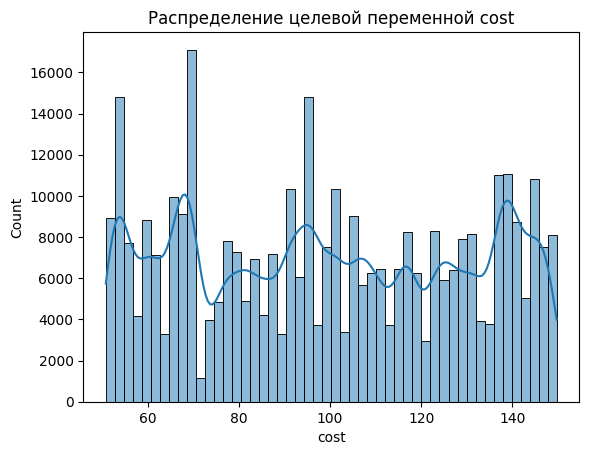

In [6]:
# 3a. Анализ целевой переменной "cost"
sns.histplot(train_df['cost'], bins=50, kde=True)
plt.title("Распределение целевой переменной cost")
plt.show()

In [7]:
# 3b. Обработка пропусков (если есть)
train_df.fillna(train_df.median(), inplace=True)

In [8]:
# 3c. Обработка выбросов
Q1 = train_df['cost'].quantile(0.25)
Q3 = train_df['cost'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
train_df = train_df[(train_df['cost'] >= lower_bound) & (train_df['cost'] <= upper_bound)]

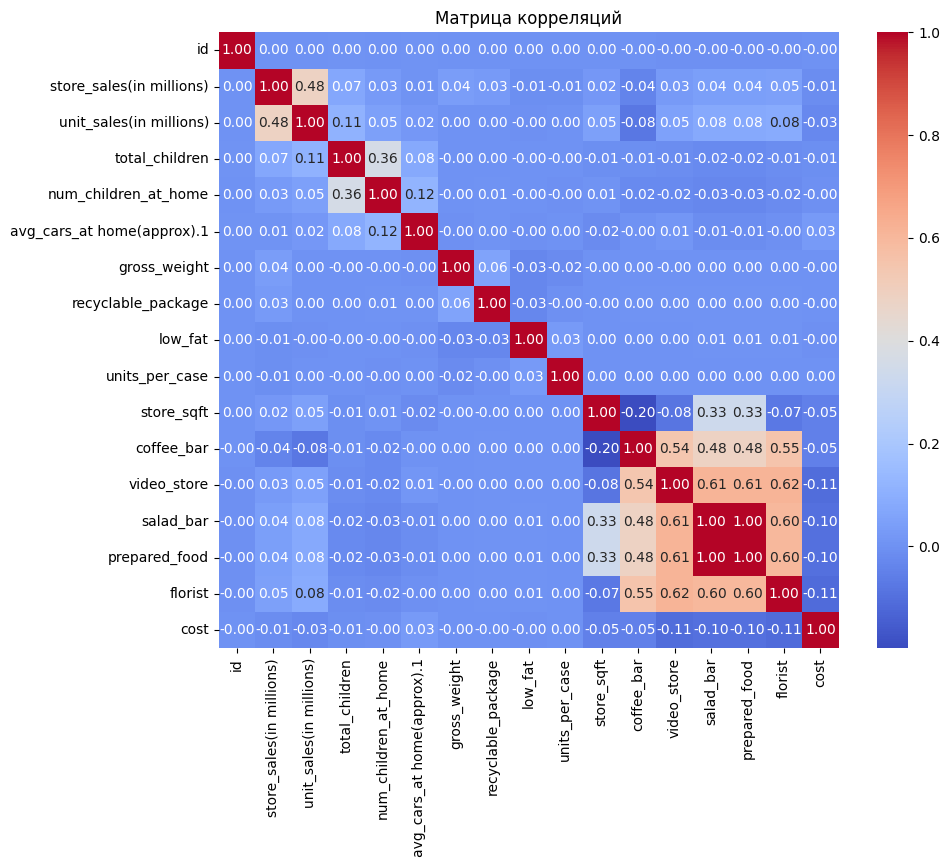

In [9]:
# 3d. Матрица корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Матрица корреляций")
plt.show()

In [10]:
# Выбираем независимые переменные (исключаем cost)
X = train_df.drop(columns=['cost'])
y = train_df['cost']


In [11]:
# 3e. Разделение данных на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# 4a. Модель OLS (statsmodels)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
ols_model = sm.OLS(y_train, X_train_const).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     350.7
Date:                Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                        09:28:48   Log-Likelihood:            -1.3860e+06
No. Observations:              288268   AIC:                         2.772e+06
Df Residuals:                  288251   BIC:                         2.772e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [13]:
# 4b. Модель Linear Regression (scikit-learn)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [14]:
# 5. Оценка качества моделей
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")


MAE: 25.60156582888064
MSE: 879.5378758223873
RMSE: 29.65700382409503
R2 Score: 0.021170524184641937


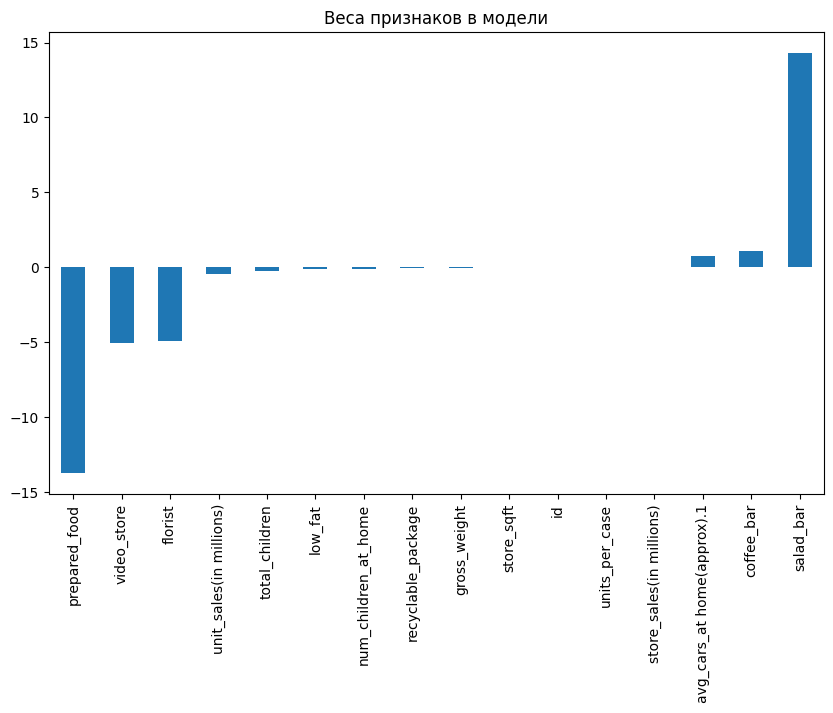

In [15]:
# 6. Визуализация коэффициентов модели
coefs = pd.Series(lr_model.coef_, index=X.columns)
coefs.sort_values().plot(kind='bar', figsize=(10, 6), title='Веса признаков в модели')
plt.show()
